# Globaler Meeresspiegel: Erste Dateninsights

In diesem Notebook untersuchen wir die Entwicklung des globalen Meeresspiegels.  
Wir beginnen mit dem Laden der Daten, gefolgt von ersten Visualisierungen und einfachen Trendanalysen.


In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# src-Module importieren
sys.path.append(os.path.join(os.path.dirname('..'), 'src'))
from src.data_loader import load_sea_level_csv

# Daten laden
df = load_sea_level_csv()
df.head()

Datei kopiert nach: /Users/paulgraefe/PycharmProjects/SeaLevel Change/src/../data/raw/sea_levels_2015.csv


,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


## Überblick über die Daten

Wir prüfen nun die Struktur und grundlegende Statistiken des Datensatzes.

In [21]:

# Info & Descriptive Stats
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB
None
              GMSL  GMSL uncertainty
count  1608.000000        1608.00000
mean    -66.079540          11.29745
std      62.893171           5.27788
min    -184.500000           6.20000
25%    -117.100000           6.70000
50%     -74.000000          10.10000
75%     -15.375000          14.00000
max      82.400000          24.20000


## Erste Visualisierungen

1. Liniendiagramm des Meeresspiegels über die Jahre  
2. Histogramm der Meeresspiegelwerte  
3. Boxplot zur Identifikation möglicher Ausreißer



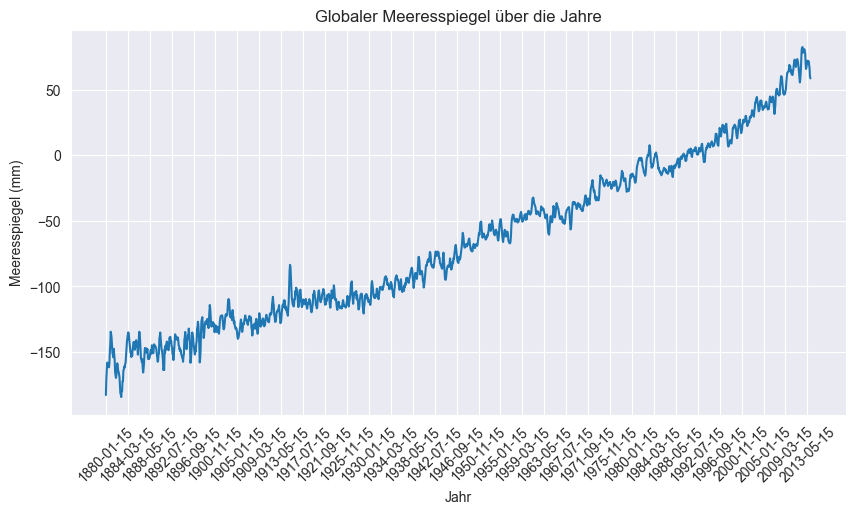

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lineplot über die Jahre
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Time', y='GMSL')
plt.title("Globaler Meeresspiegel über die Jahre")
plt.xlabel("Jahr")
plt.ylabel("Meeresspiegel (mm)")

# Nur jedes 5. Jahr auf der x-Achse anzeigen
years = df['Time'].unique()  # Alle Jahre
plt.xticks(ticks=years[::50], labels=years[::50], rotation=45)

plt.show()



## Lineare Regression

Wir erstellen nun eine einfache lineare Regression, um den Trend des Meeresspiegels über die Jahre zu visualisieren.


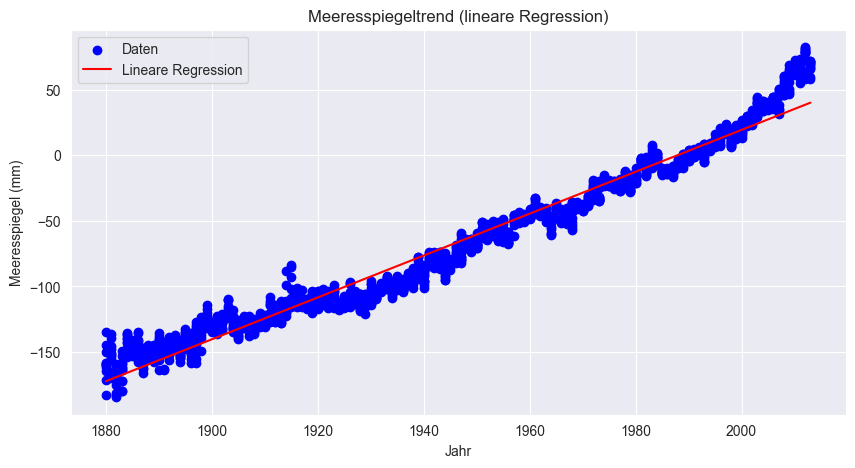

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

df['Time'] = pd.to_datetime(df['Time']).dt.year
X = df['Time'].values.reshape(-1,1)
y = df['GMSL'].values

# Lineare Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Daten', color='blue')
plt.plot(X, y_pred, color='red', label='Lineare Regression')
plt.title("Meeresspiegeltrend (lineare Regression)")
plt.xlabel("Jahr")
plt.ylabel("Meeresspiegel (mm)")
plt.legend()
plt.show()


## Interpretation des Meeresspiegeltrends

Der dargestellte Scatterplot zeigt die Entwicklung des globalen Meeresspiegels von etwa 1880 bis 2015. Die roten Linie stellt die **lineare Regression** dar und zeigt den langfristigen Trend.

### Wichtige Beobachtungen:

- Der Meeresspiegel steigt über die beobachtete Zeitspanne kontinuierlich an.  
- Die lineare Regression deutet auf einen **durchschnittlichen Anstieg von etwa 1–2 mm pro Jahr** hin (genaue Steigung lässt sich aus dem Modell ablesen).  
- Die Streuung um die Regressionslinie zeigt kurzfristige Schwankungen, die z. B. durch natürliche Klimaphänomene, saisonale Effekte oder Messungenauigkeiten entstehen können.  
- Besonders ab den 1990er-Jahren ist ein **beschleunigter Anstieg** erkennbar, da die Datenpunkte über der linearen Trendlinie liegen, was auf mögliche Verstärkungen durch den Klimawandel hindeutet.

### Fazit:

Die Daten bestätigen den langfristigen Anstieg des Meeresspiegels. Die lineare Regression liefert eine einfache Abschätzung des Trends, verdeutlicht jedoch nicht die Beschleunigung in den letzten Jahrzehnten. Für eine genauere Prognose könnten polynomiale oder andere nicht-lineare Modelle genutzt werden.



